## Compensation Data Analysis - Untransformed Predictions

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.cross_decomposition import PLSRegression

import statsmodels.api as sm

import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.weight"] = "bold"
plt.style.use('ggplot')

In [3]:
comp = pd.read_csv('data/prepped_comp_data_interactions.csv', index_col='entry_id')
comp

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
4,6.359576,5.192962,5.959718,2.197336,0.712125,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.153297,4.787500,-6.907755,3.970311,0.896446,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.247029,4.700489,4.382039,-6.907755,-0.578121,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,5.049862,4.905282,2.079567,2.565026,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.303310,5.056252,3.258135,3.332240,1.080767,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,4.744941,4.744941,-6.907755,-6.907755,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30139,5.913506,5.231114,5.010642,3.496538,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30140,5.356591,5.176155,-6.907755,3.555377,-0.762442,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
RANDOM_STATE = 721
X_train, X_test, _, _ = train_test_split(comp, comp, test_size=0.1, random_state=RANDOM_STATE)

y_total_comp = np.exp(X_train.log_total_comp)
y_salary = np.exp(X_train.log_salary)
y_stock = np.exp(X_train.log_stock)
y_bonus = np.exp(X_train.log_bonus)
X = X_train.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

y_test_total_comp = np.exp(X_test.log_total_comp)
y_test_salary = np.exp(X_test.log_salary)
y_test_stock = np.exp(X_test.log_stock)
y_test_bonus = np.exp(X_test.log_bonus)
X_test = X_test.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

X
X_test

,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
1042,0.343483,0.221278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,-0.393800,0.565848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21860,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7900,-0.209479,0.910418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,-0.393800,0.565848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13550,-0.025158,-0.467863,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,0.527804,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
23789,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11706,0.712125,1.254988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,-0.578121,-0.467863,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,-1.131083,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5982,0.343483,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25710,-0.578121,-0.467863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13958,0.896446,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [5]:
num_features = X.columns.size
alphas = 10**np.linspace(10,-2,100)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Function-ified versions of finding the best parameters of the particular regression models

def ridge(X, y):
    ridgecv = skl_lm.RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
    ridgecv.fit(X, y)

    optimal_ridge = skl_lm.Ridge()
    optimal_ridge.set_params(alpha=ridgecv.alpha_)
    optimal_ridge.fit(X, y)

    coefs = pd.Series(optimal_ridge.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_ridge.predict(X)))
    
    return {
        'alpha': ridgecv.alpha_,
        'model_type': 'ridge',
        'model': optimal_ridge,
        'intercept': optimal_ridge.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def lasso(X, y):
    lassocv = skl_lm.LassoCV(alphas = alphas, cv=kf, max_iter=10000)
    lassocv.fit(X, y)

    optimal_lasso = skl_lm.Lasso()
    optimal_lasso.set_params(alpha = lassocv.alpha_)
    optimal_lasso.fit(X, y)

    coefs = pd.Series(optimal_lasso.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_lasso.predict(X)))
    
    return {
        'alpha': lassocv.alpha_,
        'model_type': 'lasso',
        'model': optimal_lasso,
        'intercept': optimal_lasso.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def pls(X, y):
    regr = skl_lm.LinearRegression()
    num_components = 7 # num_features
    mse = []
    for i in np.arange(1, num_components):
        pls=PLSRegression(n_components=i)
        score = -1*cross_val_score(pls, X.iloc[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_components))
    min_component = np.argmin(mse_per_component) + 1

    pls = PLSRegression(n_components=min_component, scale=False)
    pls.fit(X, y)

    coefs = pd.Series(pls.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, pls.predict(X)))
    
    return {
        'model_type': 'pls',
        'model': pls,
        'intercept': None,
        'coefs': coefs,
        'rmse': rmse,
        'min_component': min_component }

# Functions to determine the best model and provide helpful output

def get_model_type_min_mse(models):
    min_model_type = None
    for index, (model_type, model) in enumerate(models.items()):            
        if index == 0 or model['rmse'] < models[min_model_type]['rmse']:
            min_model_type = model_type
    return min_model_type

def perform_model_selection(X, y, identifier):
    models = {
        'ridge': ridge(X, y),
        'lasso': lasso(X, y),
        'pls': pls(X, y),
    }
    
    print(f'Performing model selection on {identifier}.')
    for model_type in models:
        print(f'{model_type} RMSE:\t', models[model_type]['rmse'])

    best_model_type = get_model_type_min_mse(models)
    best_model = models[best_model_type]
    print(f'Best model is {best_model_type}.')
    
    print('\nIntercept:\t\t', best_model['intercept'], '\n')
    print(best_model['coefs'])
    
    return best_model, models

## Salary Model Selection

In [6]:
best_model_salary, all_models_salary = perform_model_selection(X, y_salary, 'salary')

Performing model selection on salary.
ridge RMSE:	 22.492175952436362
lasso RMSE:	 23.37235568147268
pls RMSE:	 27.762489949598926
Best model is ridge.

Intercept:		 93.97680170464962 

scaled_years_experience                  14.261272
scaled_years_company                      0.200501
company[AT&T]                           -17.948362
company[Accenture]                      -30.970276
company[Adobe]                           -3.051205
                                           ...    
company_location[Yelp_SF Bay Area]       -0.282218
company_location[Zillow_SF Bay Area]      5.055673
company_location[Zillow_Seattle Area]     8.117009
company_location[eBay_SF Bay Area]      -10.556108
company_location[eBay_Seattle Area]      -2.816690
Length: 615, dtype: float64


## Stock Model Selection

In [7]:
best_model_stock, all_models_stock = perform_model_selection(X, y_stock, 'stock')

Performing model selection on stock.
ridge RMSE:	 56.56434469786529
lasso RMSE:	 56.52928430285056
pls RMSE:	 65.9160230836081
Best model is lasso.

Intercept:		 9.862176940685707 

scaled_years_experience                  14.170095
scaled_years_company                      5.093139
company[AT&T]                           -19.584628
company[Accenture]                       -4.798501
company[Adobe]                           21.598159
                                           ...    
company_location[Yelp_SF Bay Area]        0.000000
company_location[Zillow_SF Bay Area]     -0.000000
company_location[Zillow_Seattle Area]     6.697630
company_location[eBay_SF Bay Area]       -5.739298
company_location[eBay_Seattle Area]      -0.000000
Length: 615, dtype: float64


## Bonus Model Selection

In [8]:
best_model_bonus, all_models_bonus = perform_model_selection(X, y_bonus, 'bonus')

Performing model selection on bonus.
ridge RMSE:	 20.935237127893984
lasso RMSE:	 21.361690947853344
pls RMSE:	 22.60930850773383
Best model is ridge.

Intercept:		 9.526933861392136 

scaled_years_experience                  4.817349
scaled_years_company                    -1.351502
company[AT&T]                            3.660805
company[Accenture]                      -0.801173
company[Adobe]                          -3.129773
                                           ...   
company_location[Yelp_SF Bay Area]      -2.468407
company_location[Zillow_SF Bay Area]    -0.429416
company_location[Zillow_Seattle Area]    5.276478
company_location[eBay_SF Bay Area]       1.120064
company_location[eBay_Seattle Area]     -1.367237
Length: 615, dtype: float64


## Suggested Negotiation Values

In [9]:
# Provides a range using the predicted value +/- one RMSE
def get_prediction_range(best_model, X_test, y_test):
    y_pred_rmse = best_model['rmse']
    
    y_pred = best_model['model'].predict(X_test).flatten()
    y_pred_lower_bound = y_pred - y_pred_rmse
    y_pred_upper_bound = y_pred + y_pred_rmse
    
    y_pred[y_pred < 0] = 0
    y_pred_lower_bound[y_pred_lower_bound < 0] = 0
    y_pred_upper_bound[y_pred_upper_bound < 0] = 0

    test_error = np.sqrt(mean_squared_error(y_test, y_pred))
    print(test_error)

    y_pred_range = pd.DataFrame(data={
        'pred_lower_bound': y_pred_lower_bound,
        'pred': y_pred,
        'pred_upper_bound': y_pred_upper_bound,
    }, index=X_test.index)
    
    return y_pred_range

In [10]:
y_pred_salary_range = get_prediction_range(best_model_salary, X_test, y_test_salary)
y_pred_salary_range

23.4633369286541


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,117.341382,139.833558,162.325734
11706,118.248780,140.740956,163.233132
310,154.554390,177.046566,199.538742
815,113.598847,136.091023,158.583199
5982,144.428575,166.920751,189.412927
...,...,...,...
25211,84.330086,106.822262,129.314437
25710,114.726609,137.218785,159.710961
13958,163.884279,186.376455,208.868631


In [11]:
y_pred_stock_range = get_prediction_range(best_model_stock, X_test, y_test_stock)
y_pred_stock_range

59.055699246004394


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,20.999469,77.528753,134.058038
11706,0.000000,52.560936,109.090220
310,54.503057,111.032342,167.561626
815,0.000000,41.816732,98.346017
5982,26.751395,83.280680,139.809964
...,...,...,...
25211,0.000000,0.000000,55.305780
25710,0.000000,8.551175,65.080459
13958,65.498229,122.027514,178.556798


In [12]:
y_pred_bonus_range = get_prediction_range(best_model_bonus, X_test, y_test_bonus)
y_pred_bonus_range

20.92185024248042


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,0.000000,7.534488,28.469725
11706,0.000000,20.706201,41.641438
310,4.279086,25.214324,46.149561
815,0.000000,20.026249,40.961486
5982,0.000000,19.812194,40.747432
...,...,...,...
25211,0.000000,9.724819,30.660056
25710,0.000000,20.169802,41.105039
13958,17.102029,38.037267,58.972504


In [13]:
# Adds up the individual predictions for salary + stock + bonus, and determines test error on total comp
y_pred_total_comp_sum_range = y_pred_salary_range + y_pred_stock_range + y_pred_bonus_range
np.sqrt(mean_squared_error(y_test_total_comp, y_pred_total_comp_sum_range.pred))
y_pred_total_comp_sum_range

77.56421385437447

,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,138.340851,224.896799,324.853497
11706,118.248780,214.008094,313.964791
310,213.336534,313.293231,413.249929
815,113.598847,197.934005,297.890702
5982,171.179970,270.013625,369.970322
...,...,...,...
25211,84.330086,116.547081,215.280274
25710,114.726609,165.939762,265.896460
13958,246.484537,346.441235,446.397932


In [14]:
best_model_salary['alpha']
best_model_stock['alpha']
best_model_bonus['alpha']

0.8697490026177834

0.01

2.009233002565046

## Analysis

In [15]:
def plot_coefs(coefs, condition = None):
    if condition is None:
        coefs_filtered = coefs
    else:
        coefs_filtered = coefs[condition]
        
    coefs_filtered = coefs_filtered.sort_values()
    plt.bar(coefs_filtered.index, coefs_filtered)
    plt.xticks(rotation=90)
    plt.ylabel('Regression Coefficient ($ in thousands)')
    
coefs_salary = best_model_salary['coefs']
coefs_stock = best_model_stock['coefs']
coefs_bonus = best_model_bonus['coefs']

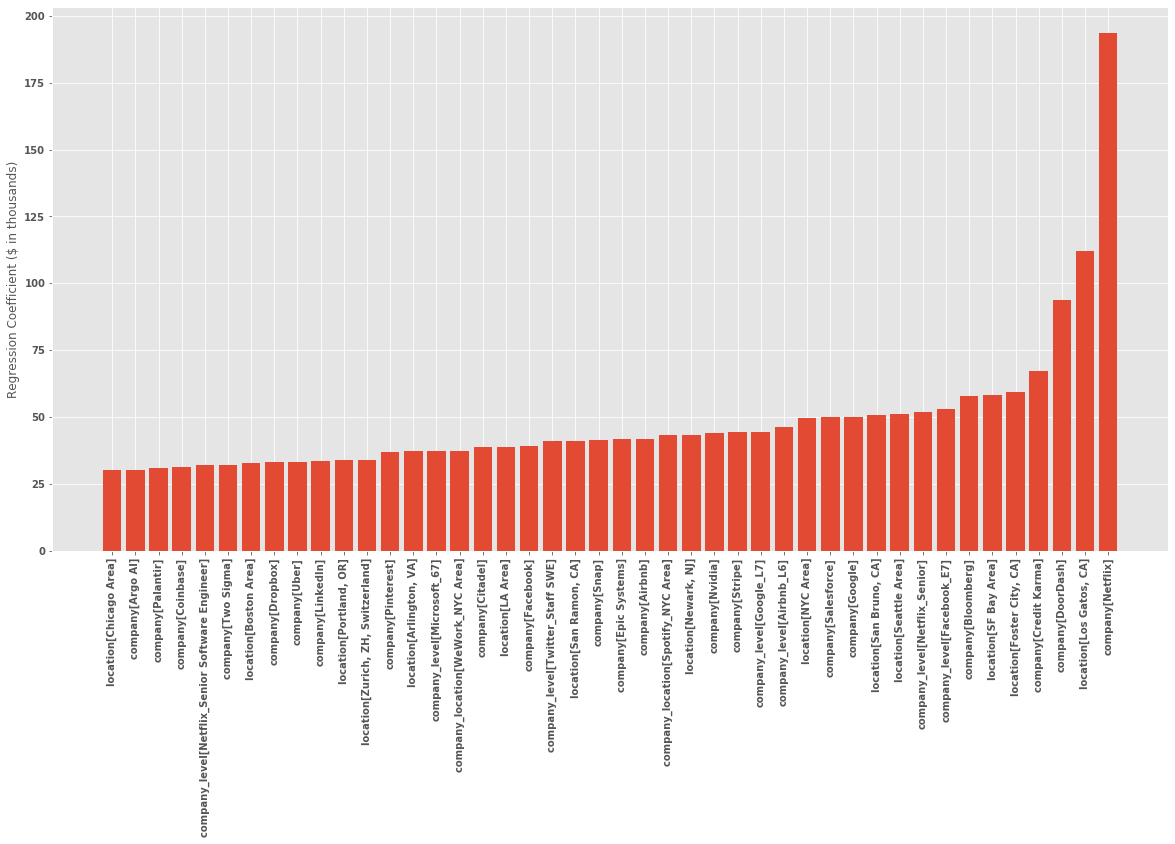

In [16]:
plot_coefs(coefs_salary, coefs_salary > 30)

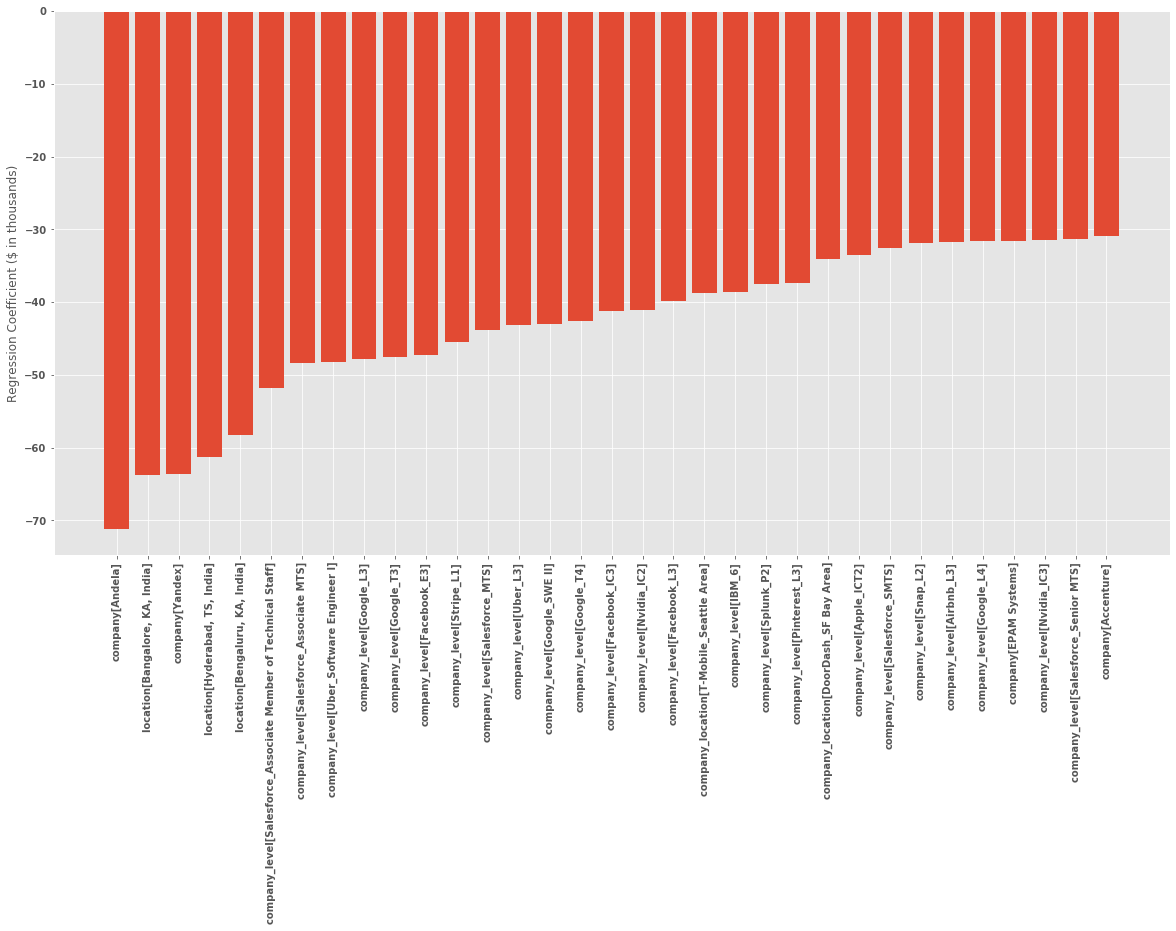

In [17]:
plot_coefs(coefs_salary, coefs_salary < -30)

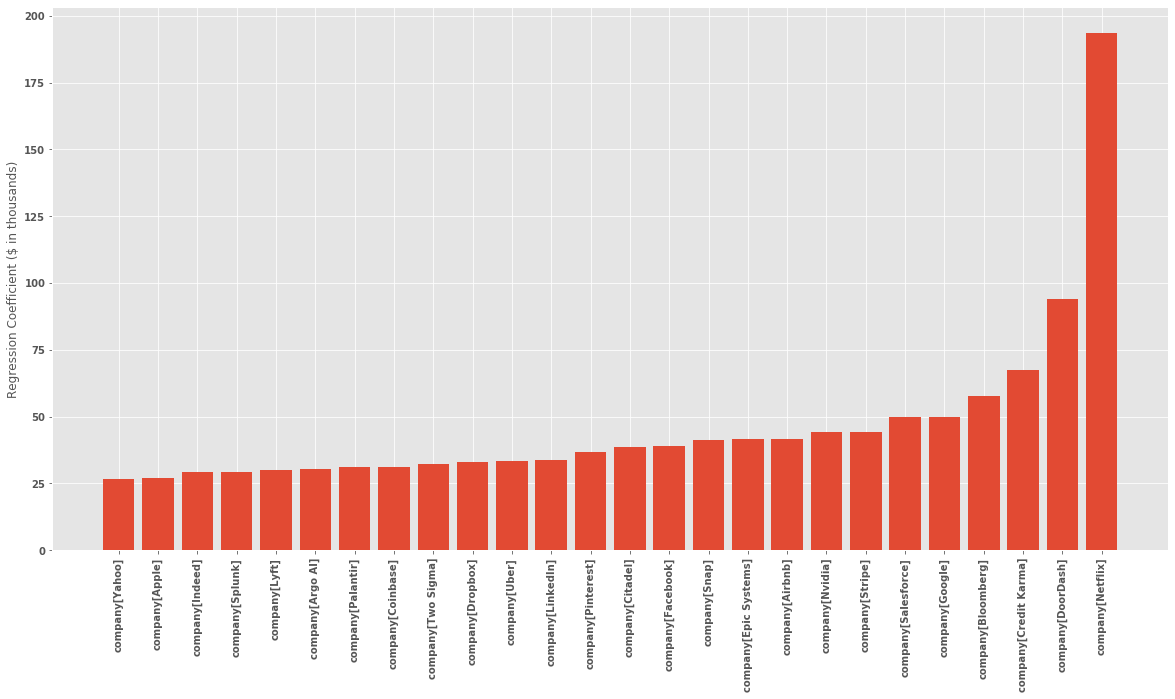

In [18]:
coefs_company = coefs_salary.filter(like='company[')
plot_coefs(coefs_company, coefs_company > 25)

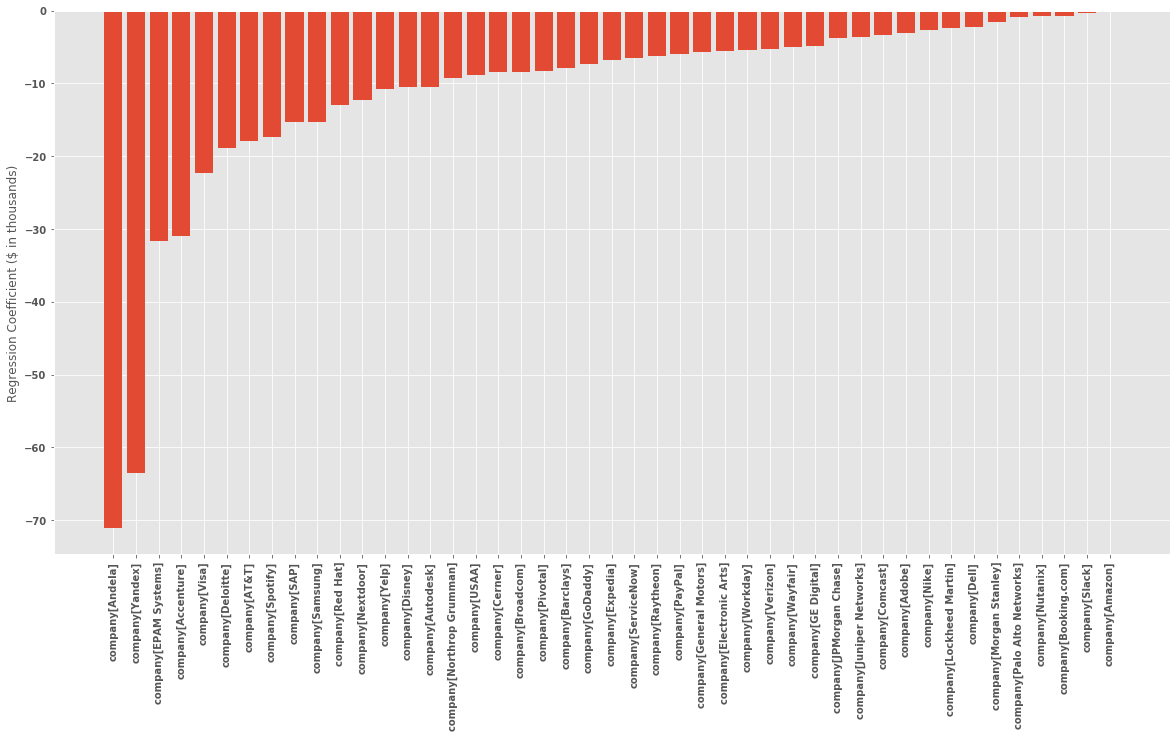

In [19]:
plot_coefs(coefs_company, coefs_company < 0)

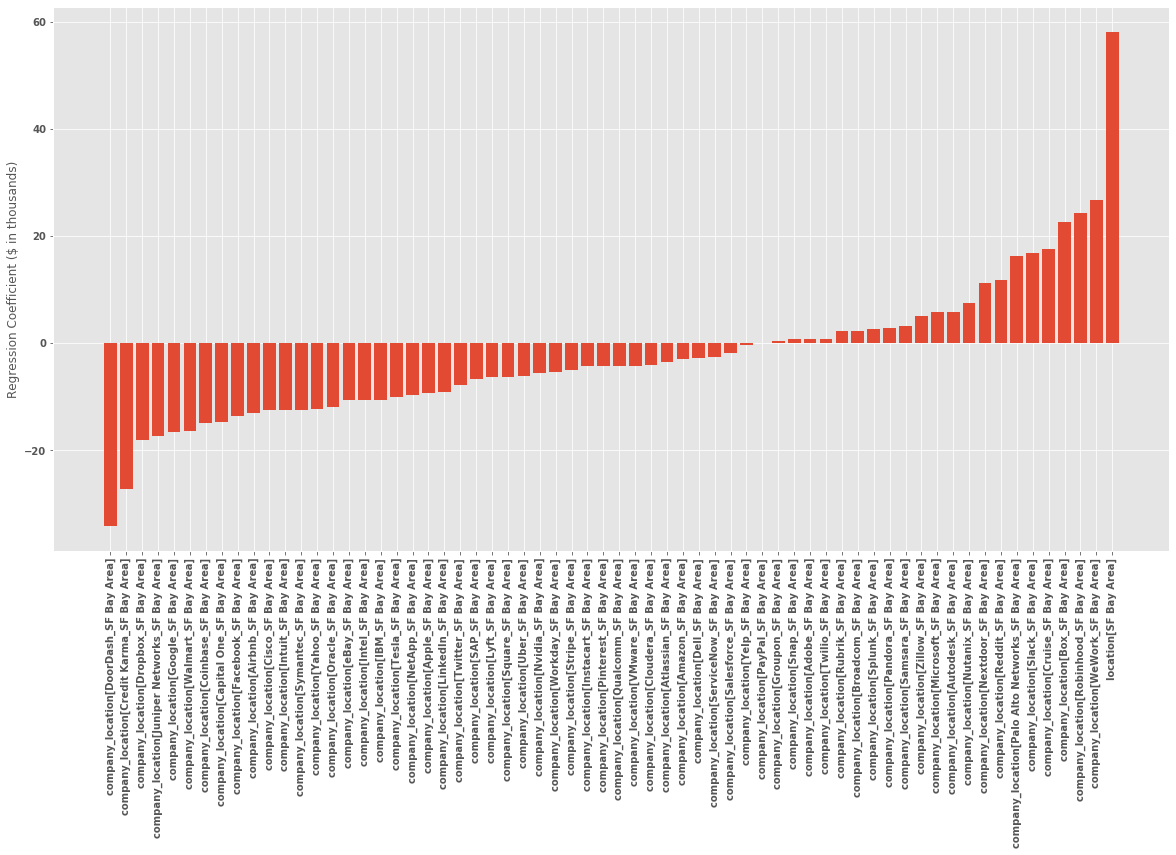

In [20]:
plot_coefs(coefs_salary.filter(like='SF'))

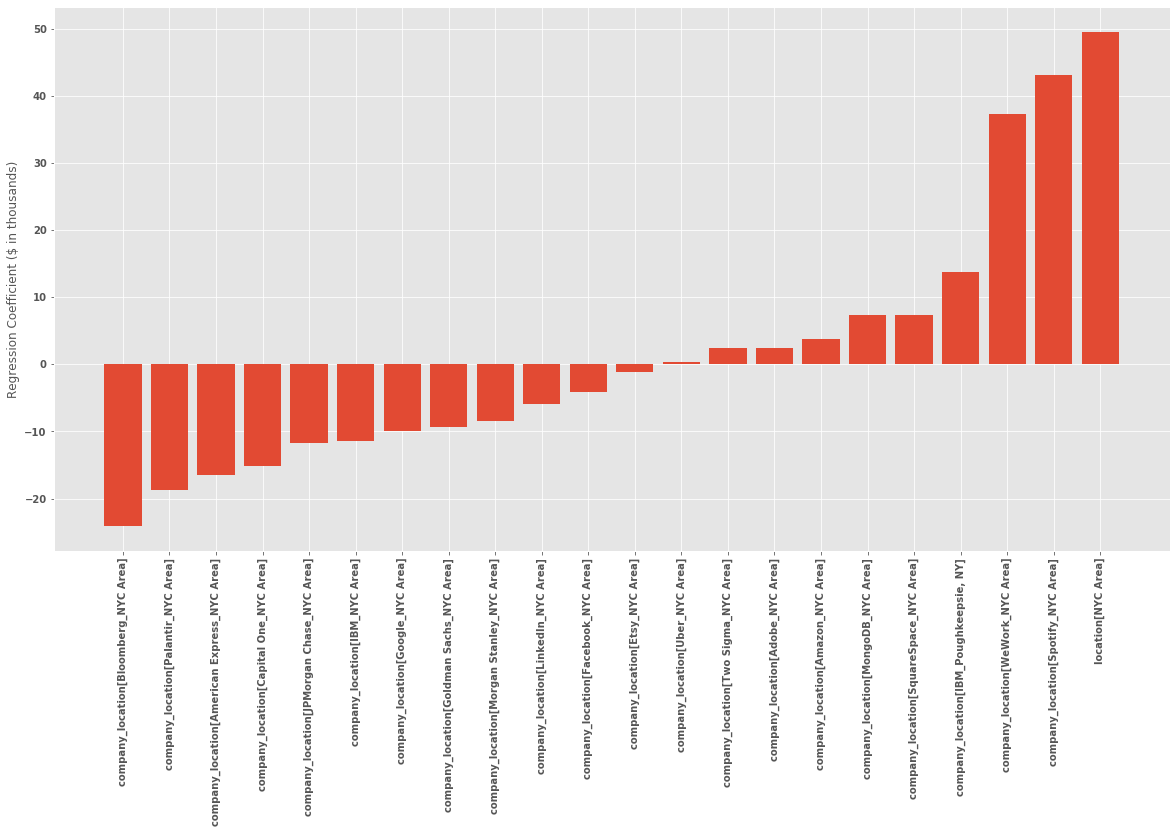

In [21]:
plot_coefs(coefs_salary.filter(like='NY'))

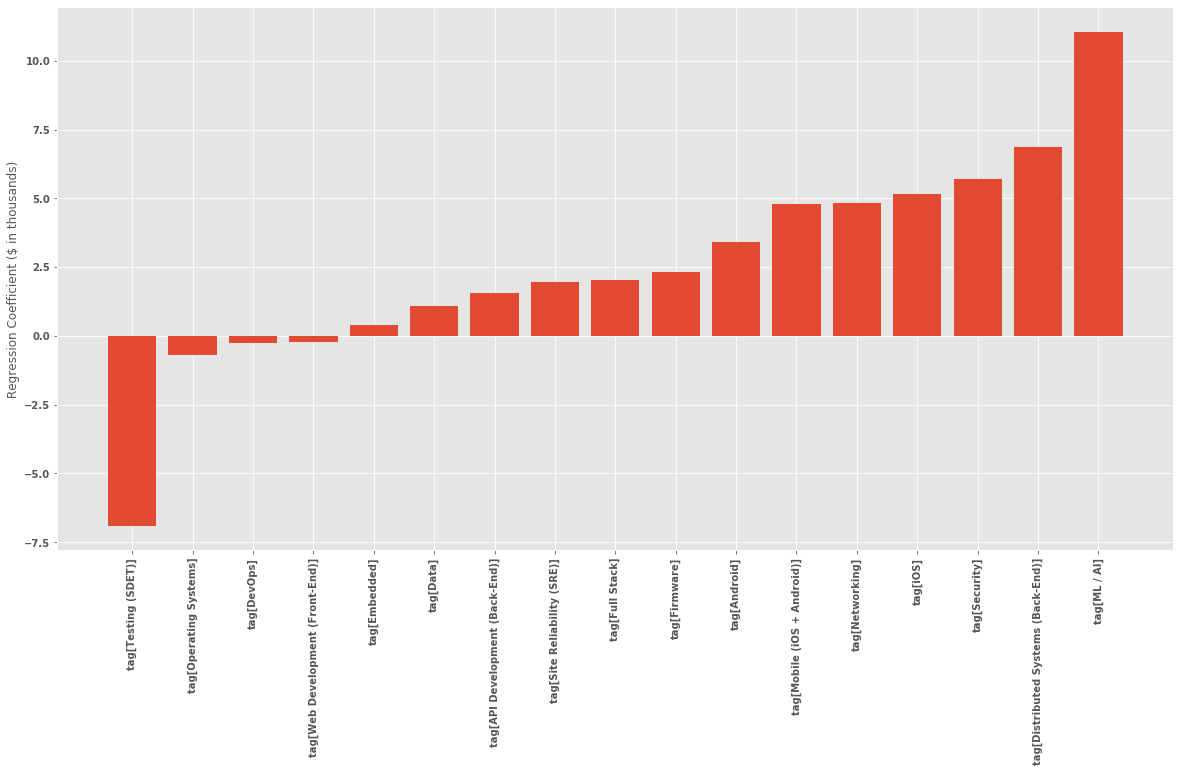

In [22]:
plot_coefs(coefs_salary.filter(like='tag['))

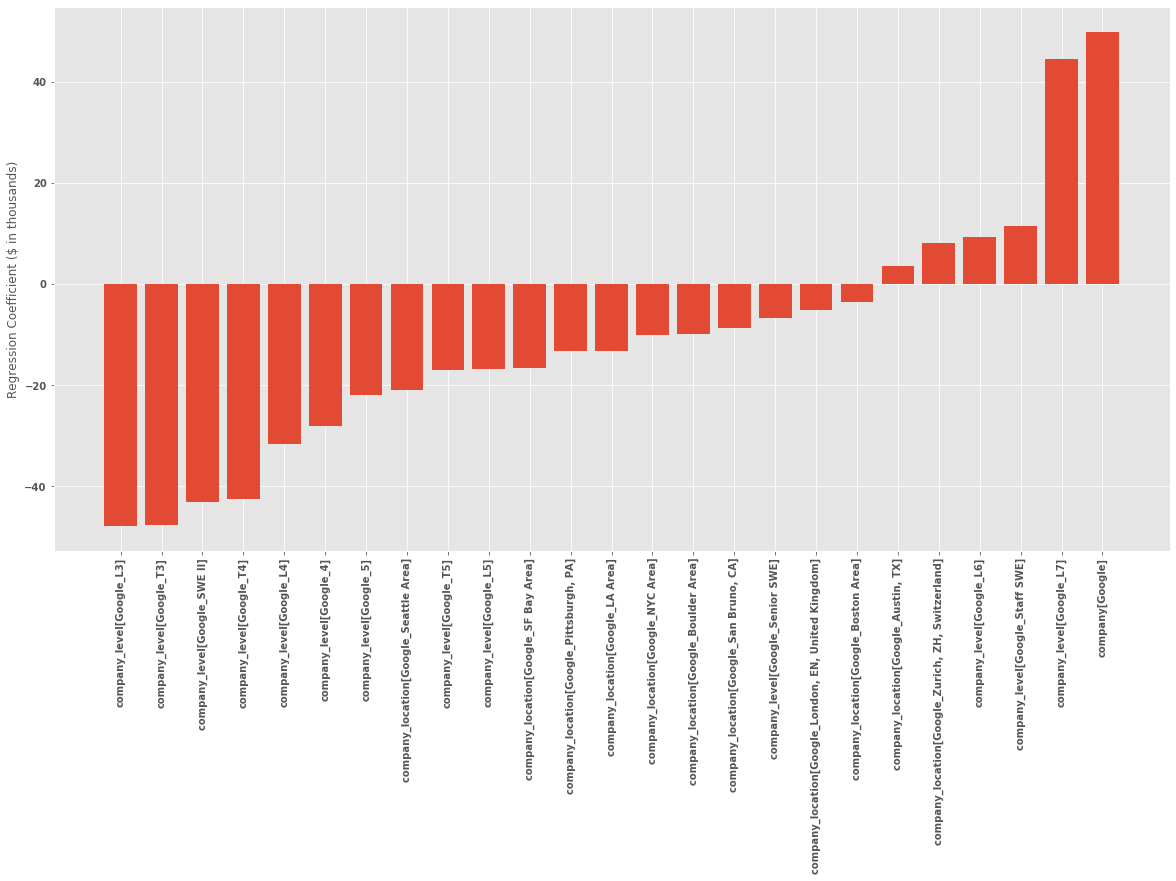

In [23]:
plot_coefs(coefs_salary.filter(like='Google'))

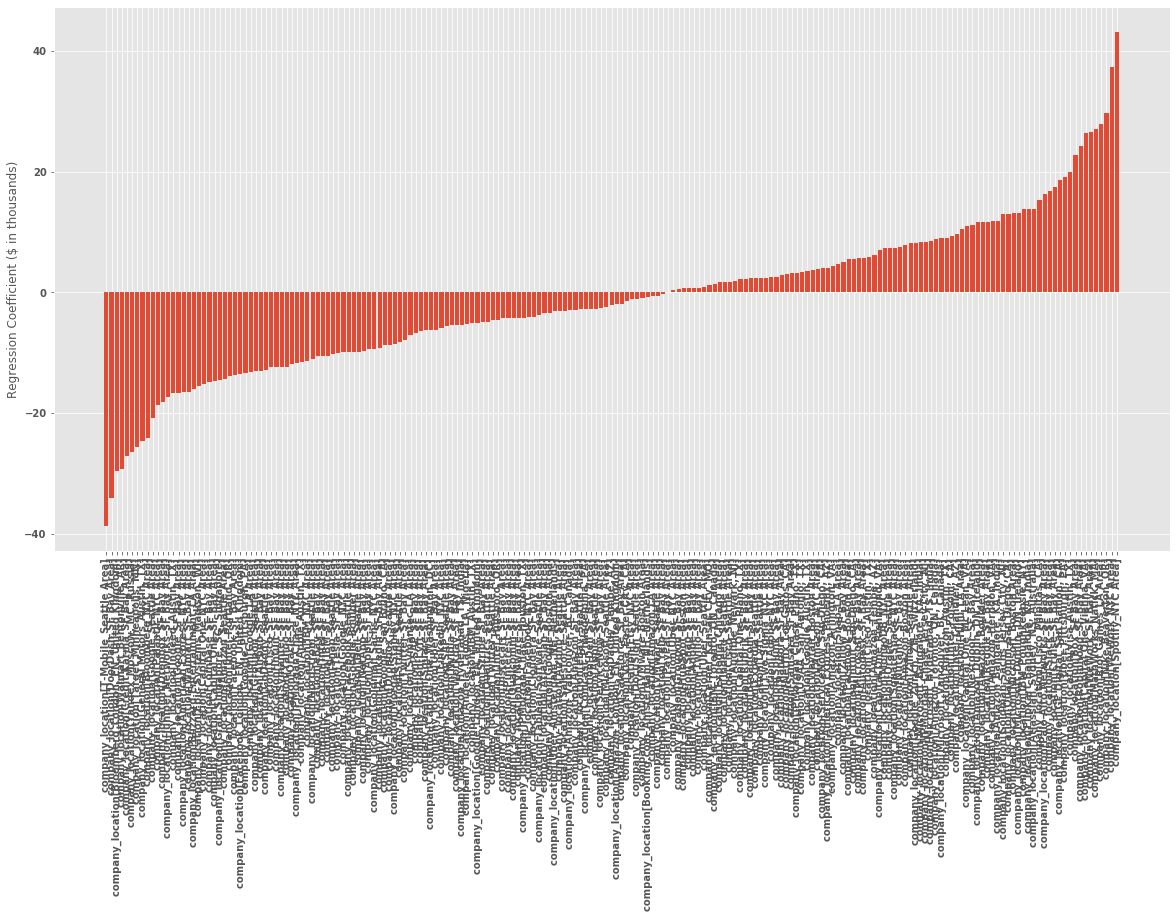

In [24]:
plot_coefs(coefs_salary.filter(like='company_location['))

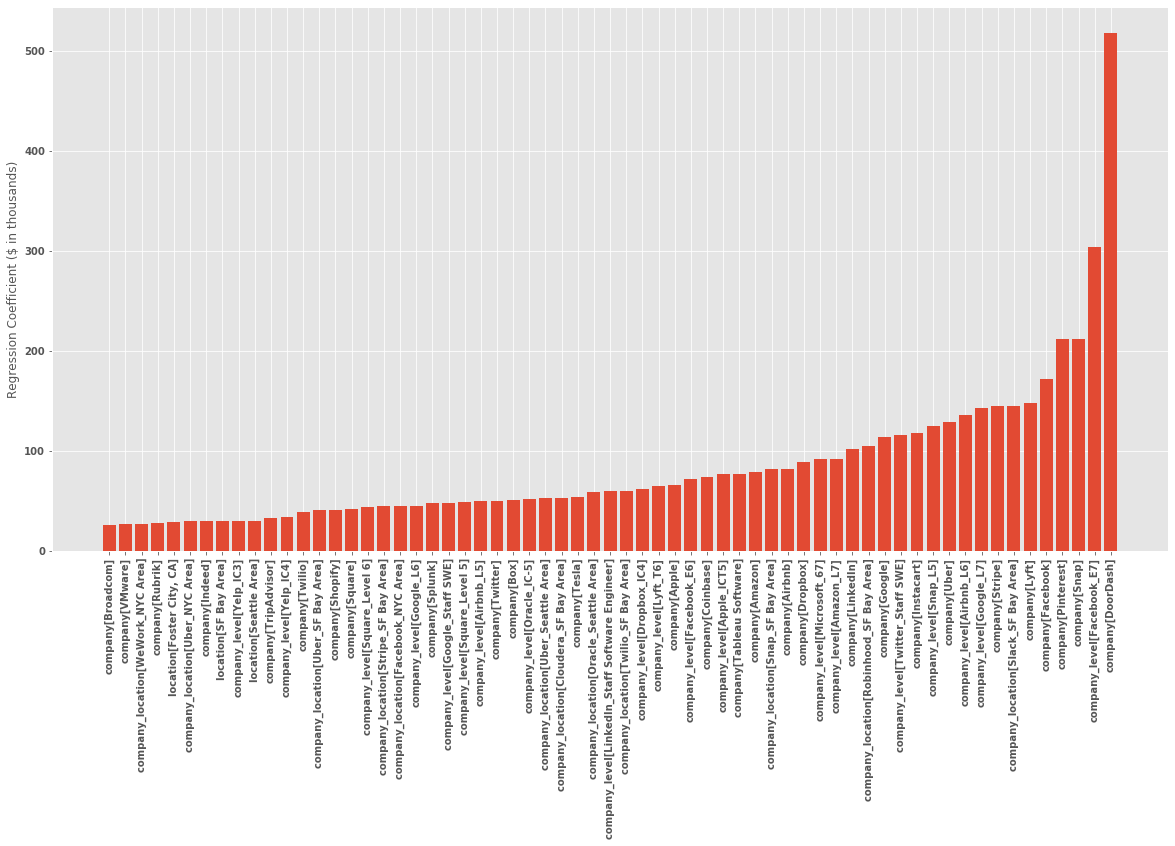

In [25]:
plot_coefs(coefs_stock, coefs_stock > 25)

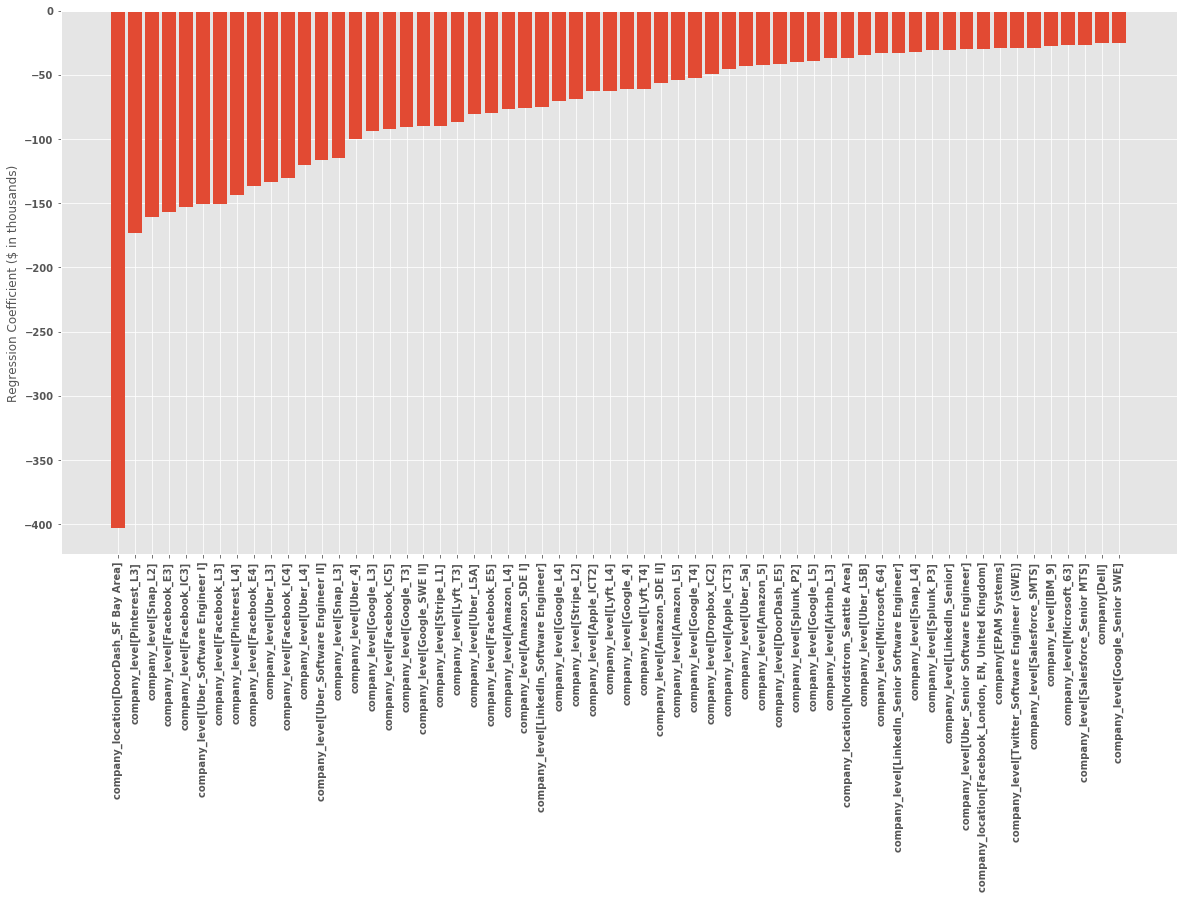

In [26]:
plot_coefs(coefs_stock, coefs_stock < -25)

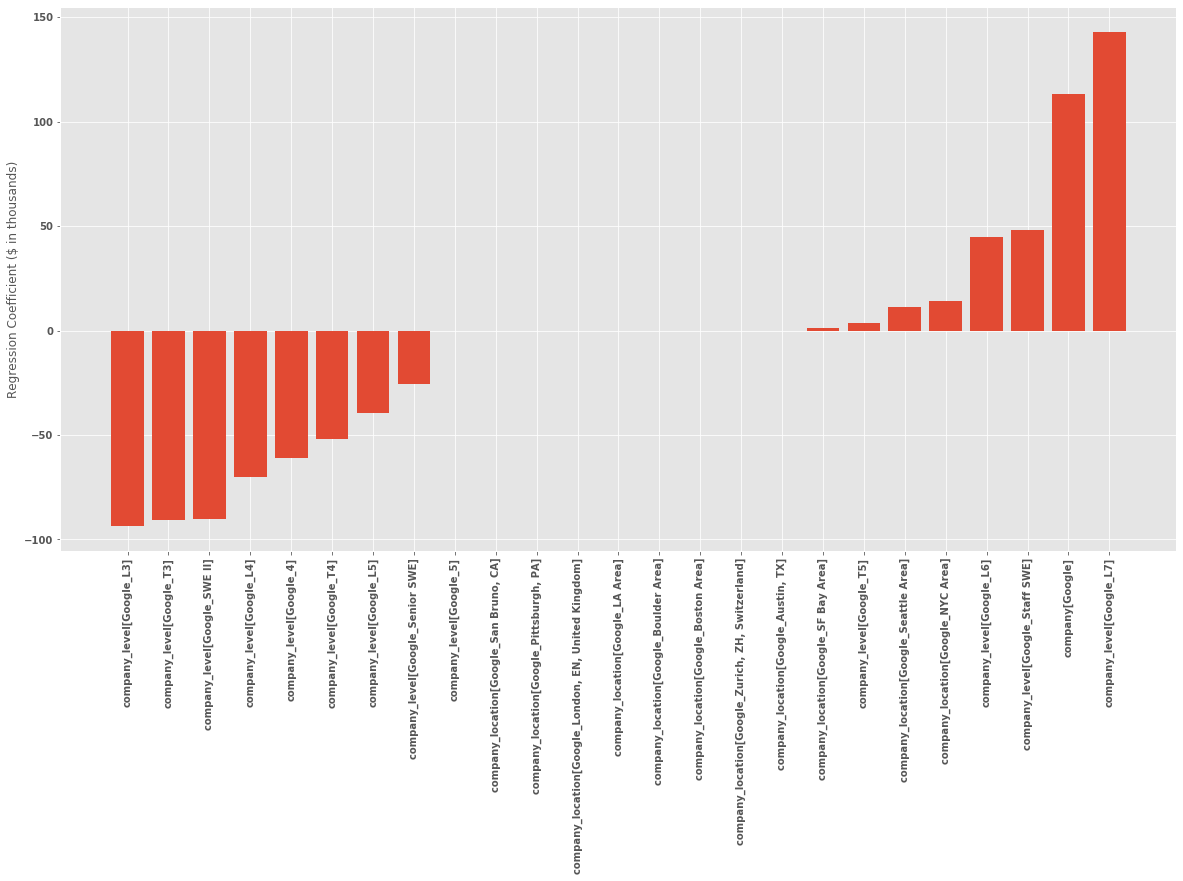

In [27]:
plot_coefs(coefs_stock.filter(like='Google'))

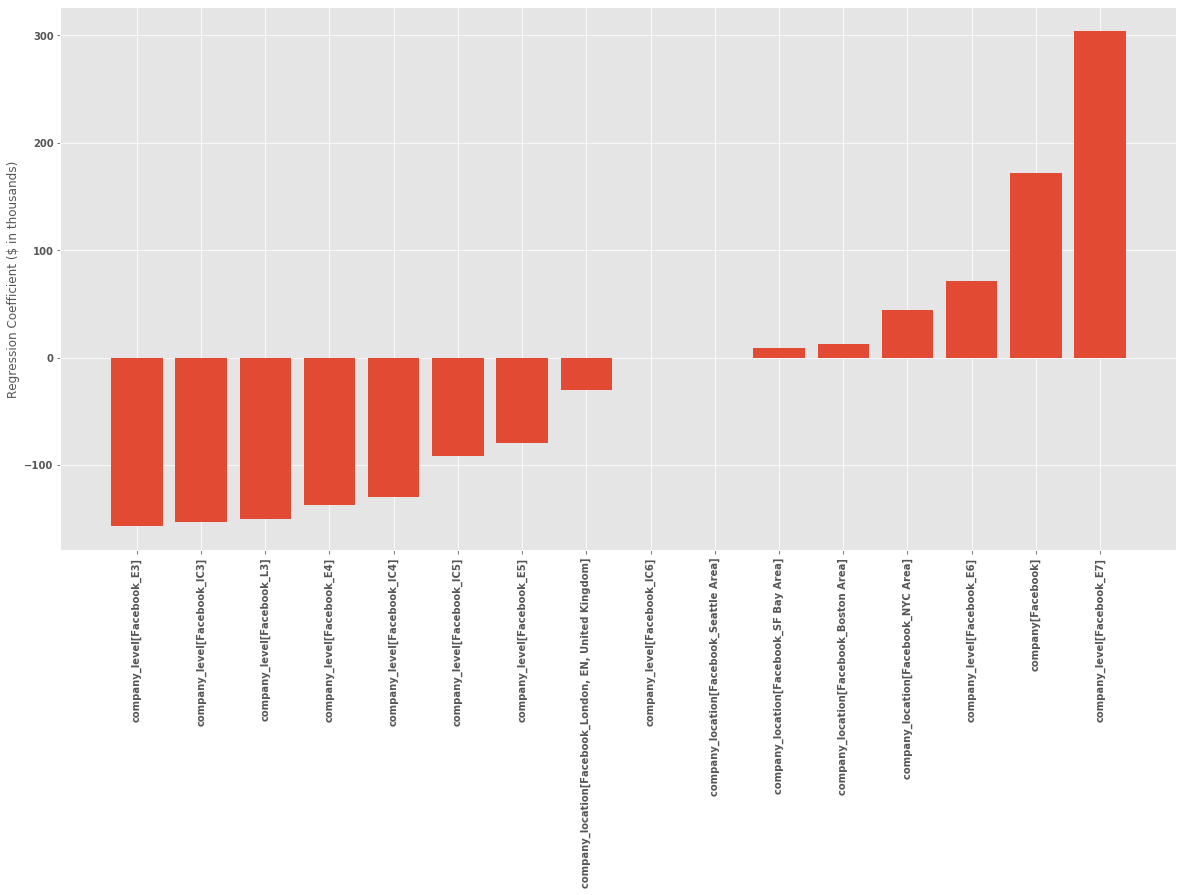

In [28]:
plot_coefs(coefs_stock.filter(like='Facebook'))